Prueba para ver las imagenes

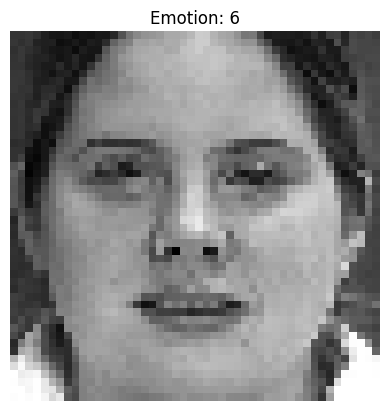

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')

# selecciono fila del cvs
first_row = df.iloc[476]

# Obtener los valores de los píxeles y convertirlos en una lista de enteros
pixels = list(map(int, first_row['pixels'].split()))

# Convertir la lista de píxeles en un array de numpy
pixels_array = np.array(pixels)

# Remodelar el array en una imagen de 48x48 píxeles (suponiendo que las imágenes sean de 48x48)
image = pixels_array.reshape(48, 48)

# Mostrar la imagen
plt.imshow(image, cmap='gray')
plt.title(f'Emotion: {first_row["emotion"]}')
plt.axis('off')  # Opcional: para ocultar los ejes
plt.show()


Carga y procesamiento del csv

In [92]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Cargar el CSV
data = pd.read_csv('dataset.csv')

# Convertir los datos de píxeles a una matriz numpy
def process_pixels(pixels):
    pixels = np.array([int(pixel) for pixel in pixels.split()])
    pixels = pixels.reshape(48, 48)
    return pixels

data['pixels'] = data['pixels'].apply(process_pixels)

# Convertir emociones a una matriz de etiquetas
emotion_dict = {0: 'Enojo', 1: 'Disgusto', 2: 'Miedo', 3: 'Felicidad', 4: 'Tristeza', 5: 'Sorpresa', 6: 'Neutral', 7: 'Desprecio',}
data['emotion'] = data['emotion'].apply(lambda x: emotion_dict[x])

# Dividir entre entrenamiento y prueba 
train_data = data[data['Usage'] == 'Training']
test_data = data[data['Usage'] != 'Training']

X_train = np.array([image.flatten() for image in train_data['pixels'].values])
y_train = pd.get_dummies(train_data['emotion']).values

X_test = np.array([image.flatten() for image in test_data['pixels'].values])
y_test = pd.get_dummies(test_data['emotion']).values

print(X_train)
print(y_train)


[[ 36  39  35 ... 193 251 253]
 [ 88  74  19 ...  50  27  33]
 [  9   2   4 ...   0   0   0]
 ...
 [ 45  16  11 ...  31  34  32]
 [ 12   7   6 ... 144 143 143]
 [ 53  53  53 ...  62  57  54]]
[[False False False ...  True False False]
 [False False False ...  True False False]
 [False False False ...  True False False]
 ...
 [False False False ... False  True False]
 [False False False ... False  True False]
 [False False False ... False  True False]]


Paso 2: Implementación de la red neuronal con backpropagationVamos a crear una red neuronal con una capa de entrada (48*48), dos capas ocultas (128 y 64 neuronas) y una capa de salida (7 neuronas, una por cada emoción).

Funciones de foward y backward 

In [59]:


# Funciones de activación
# Definir la función sigmoide y su derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


# Inicialización de parámetros
print( y_train)

input_size = X_train.shape[1]
hidden_size = 128  # Ejemplo, puedes ajustar según tu caso
output_size = y_train.shape[1]


#Esto lo dejo para cuando se complej
#input_neurons = 48 * 48
#hidden_neurons1 = 128
#hidden_neurons2 = 64
#output_neurons = 7  # Hay 7 emociones


W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((output_size, 1))

# Hiperparámetros
learning_rate = 0.1
epochs = 50


def forward(X):
    Z1 = np.dot(W1.T, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2.T, A1) + b2
    A2 = sigmoid(Z2)
    return A2, A1

# Función de backward pass y actualización de pesos
def backward(X, y_true, A1, output, learning_rate=0.01):
    global W2, b2, W1, b1
    error = y_true - output
    d_output = error * sigmoid_derivative(output)
    
    error_hidden_layer = np.dot(W2, d_output)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(A1)

    # Actualización de pesos y sesgos
    
    W2 += learning_rate * np.dot(A1, d_output.T)
    b2 += learning_rate * np.sum(d_output, axis=1, keepdims=True)
    W1 += learning_rate * np.dot(X, d_hidden_layer.T)
    b1 += learning_rate * np.sum(d_hidden_layer, axis=1, keepdims=True)

[[False False False ...  True False False]
 [False False False ...  True False False]
 [False False False ...  True False False]
 ...
 [False False False ... False  True False]
 [False False False ... False  True False]
 [False False False ... False  True False]]


Paso 3: Entrenamiento y predicciónImplementar el forward pass, calcular la pérdida y realizar el backward pass para ajustar los pesos y sesgos.

In [60]:
# Entrenamiento
for epoch in range(50):  # número de iteraciones de ejemplo
    for i in range(len(X_train)):  # iterar sobre cada muestra de entrenamiento
        X = X_train[i].reshape(-1, 1)
        y_true = y_train[i].reshape(-1, 1)
        
        output, A1 = forward(X)
        backward(X, y_true, A1, output)

C:\Users\Roman\AppData\Local\Temp\ipykernel_30864\2983320945.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
# 1. Obtener las predicciones
predictions = forward(X_test)

# 2. Evaluar el rendimiento
from sklearn.metrics import accuracy_score, classification_report

# Convertir las predicciones a etiquetas de clase
predicted_labels = np.argmax(predictions, axis=1)

# Calcular la precisión
accuracy = accuracy_score(y_test, predicted_labels)
print("Precisión:", accuracy)

# Mostrar un informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, predicted_labels))

# 3. Visualizar los resultados (si es necesario)
# Esto dependerá de tu problema específico y de las herramientas de visualización disponibles.


In [61]:
# Realizar la prueba
predictions = []

for i in range(len(X_test)):
    X = X_test[i].reshape(-1, 1)
    y_true = y_test[i].reshape(-1, 1)
    
    # Forward pass
    output, _ = forward(X)
    
    # Redondear la salida para obtener la predicción (asumiendo que es una clasificación binaria)
    prediction = np.round(output)
    predictions.append(prediction)

# Convertir las listas de predicciones y etiquetas de prueba en matrices numpy
predictions = np.array(predictions).squeeze()  # Eliminar dimensiones redundantes
y_test = np.array(y_test).squeeze()

# Calcular la precisión
accuracy_score = accuracy(y_test, predictions)

print("Precisión del modelo:", accuracy_score)


C:\Users\Roman\AppData\Local\Temp\ipykernel_30864\2983320945.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


NameError: name 'accuracy' is not defined

[83 84 84 ... 79 81 77]


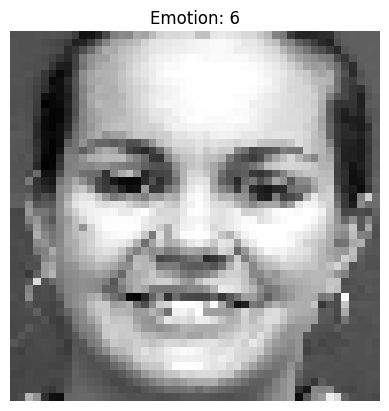

In [87]:
#A ver la imagen que voy a mandar? 
indice = 120
print(X_test[indice])
pixels = X_test[indice]
image = pixels.reshape(48, 48)

# Mostrar la imagen
plt.imshow(image, cmap='gray')
plt.title(f'Emotion: {first_row["emotion"]}')
plt.axis('off')  # Opcional: para ocultar los ejes
plt.show()



In [91]:
def predict_emotion(index):
    # Seleccionar la línea específica del conjunto de prueba
    X = X_test[index].reshape(-1, 1)

    # Realizar la predicción usando la red neuronal ya entrenada
    output, _ = forward(X)

    # Redondear la salida para obtener la predicción (asumiendo que es una clasificación binaria)
    prediction = np.round(output)
    print(prediction)
    # Convertir la predicción a la etiqueta de emoción
    predicted_emotion = emotion_dict[prediction.argmax()]

    # Imprimir la emoción predicha
    print("La emoción predicha para la línea {} del conjunto de prueba es: {}   {}".format(index, predicted_emotion, prediction.argmax()))

# Índice de la línea que deseas predecir
index_to_predict = 123  # Cambia esto al índice deseado

# Hacer la predicción
predict_emotion(index_to_predict)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]
La emoción predicha para la línea 123 del conjunto de prueba es: Neutral   6


C:\Users\Roman\AppData\Local\Temp\ipykernel_30864\2983320945.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
